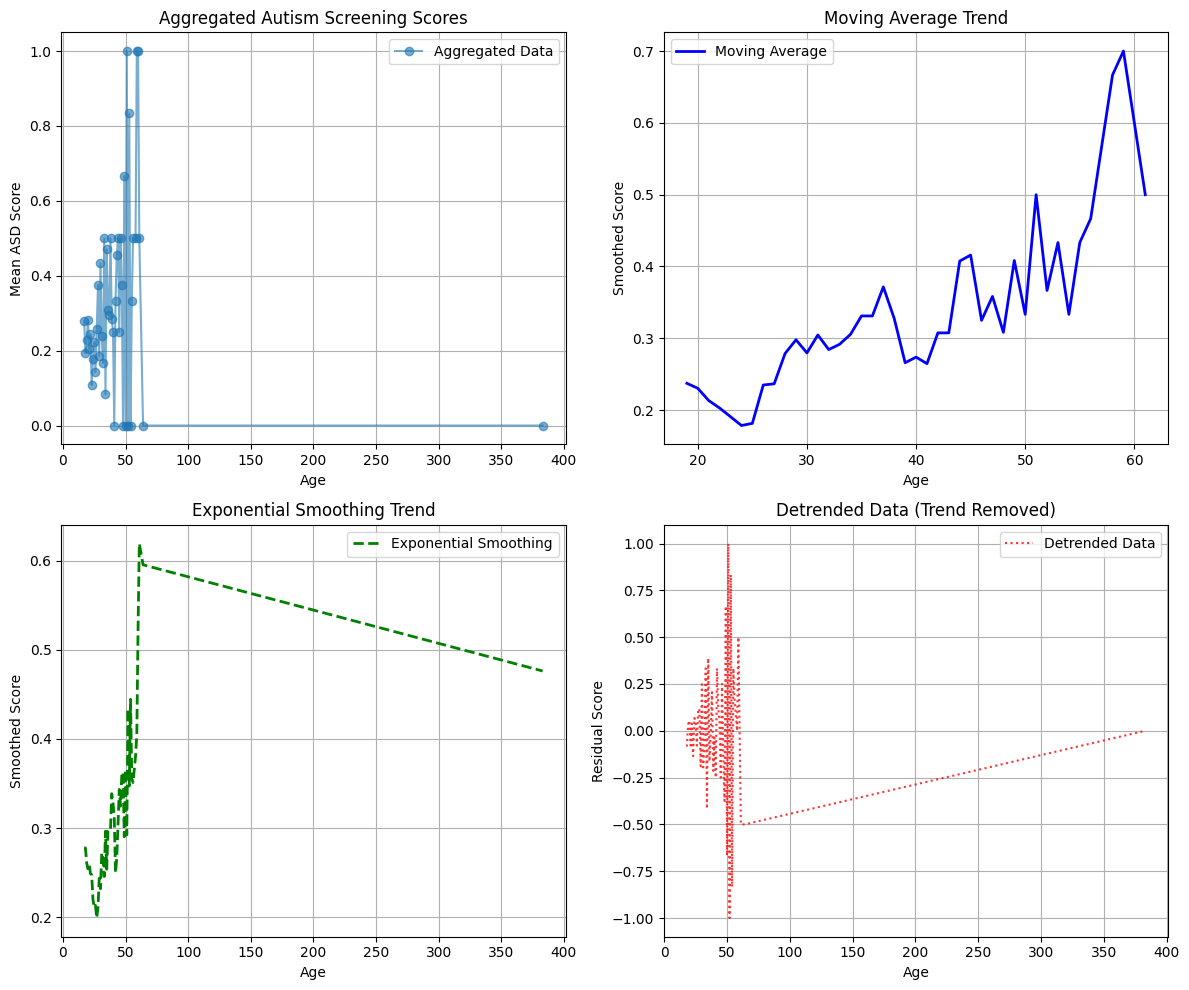

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

# Load dataset (update file path)
file_path = "/content/autism_screening.csv"  # Update with actual file path
df = pd.read_csv(file_path)

# Convert column names to lowercase and remove spaces
df.columns = df.columns.str.strip().str.lower()

# Ensure relevant columns exist
required_columns = {'age', 'class/asd'}
if not required_columns.issubset(df.columns):
    raise ValueError(f"Dataset is missing required columns: {required_columns - set(df.columns)}")

# Convert 'class/asd' to numeric (YES = 1, NO = 0)
df["class/asd"] = df["class/asd"].map({"YES": 1, "NO": 0})

# Aggregate data: Average ASD classification per age
df_agg = df.groupby("age")["class/asd"].mean().reset_index()

# Rolling mean (moving average) trend estimation
df_agg["Moving_Avg"] = df_agg["class/asd"].rolling(window=5, center=True).mean()

# Exponential Smoothing trend estimation
exp_smooth = SimpleExpSmoothing(df_agg["class/asd"]).fit(smoothing_level=0.2, optimized=False)
df_agg["Exp_Smooth"] = exp_smooth.fittedvalues

# Detrending using differencing
df_agg["Detrended"] = df_agg["class/asd"].diff()

# Create subplots for visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original Data (Aggregated)
axes[0, 0].plot(df_agg["age"], df_agg["class/asd"], marker="o", linestyle="-", alpha=0.6, label="Aggregated Data")
axes[0, 0].set_title("Aggregated Autism Screening Scores")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Mean ASD Score")
axes[0, 0].legend()
axes[0, 0].grid(True)

# Moving Average Trend
axes[0, 1].plot(df_agg["age"], df_agg["Moving_Avg"], color="blue", linewidth=2, label="Moving Average")
axes[0, 1].set_title("Moving Average Trend")
axes[0, 1].set_xlabel("Age")
axes[0, 1].set_ylabel("Smoothed Score")
axes[0, 1].legend()
axes[0, 1].grid(True)

# Exponential Smoothing
axes[1, 0].plot(df_agg["age"], df_agg["Exp_Smooth"], color="green", linestyle="--", linewidth=2, label="Exponential Smoothing")
axes[1, 0].set_title("Exponential Smoothing Trend")
axes[1, 0].set_xlabel("Age")
axes[1, 0].set_ylabel("Smoothed Score")
axes[1, 0].legend()
axes[1, 0].grid(True)

# Detrended Data
axes[1, 1].plot(df_agg["age"], df_agg["Detrended"], color="red", linestyle="dotted", alpha=0.8, label="Detrended Data")
axes[1, 1].set_title("Detrended Data (Trend Removed)")
axes[1, 1].set_xlabel("Age")
axes[1, 1].set_ylabel("Residual Score")
axes[1, 1].legend()
axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()
